In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import zipfile

In [3]:
with zipfile.ZipFile('/content/drive/MyDrive/spaceship-titanic.zip') as leitura:
  print(*leitura.namelist(), sep='\n')

sample_submission.csv
test.csv
train.csv


In [4]:
with zipfile.ZipFile('/content/drive/MyDrive/spaceship-titanic.zip') as abrir:
  with abrir.open('train.csv') as abc:
    train = pd.read_csv(abc)

In [5]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [6]:
with zipfile.ZipFile('/content/drive/MyDrive/spaceship-titanic.zip') as versaotest:
  with versaotest.open('test.csv') as tst:
    test = pd.read_csv(tst)

In [7]:
Passageiroid = test[['PassengerId', 'HomePlanet']].copy()

In [8]:
Passageiroid

,PassengerId,HomePlanet
0,0013_01,Earth
1,0018_01,Earth
2,0019_01,Europa
3,0021_01,Europa
4,0023_01,Earth
...,...,...
4272,9266_02,Earth
4273,9269_01,Earth
4274,9271_01,Mars
4275,9273_01,Europa


In [9]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [10]:
train.shape, test.shape

((8693, 14), (4277, 13))

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [12]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
train.duplicated().sum()

0

In [14]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [15]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


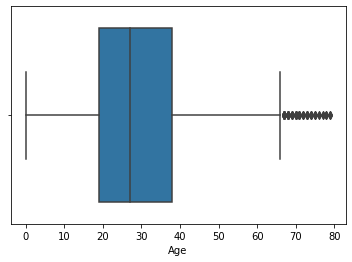

In [16]:
sns.boxplot(x = train['Age'])

In [17]:
train[train['Age'] > 65]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
118,0126_01,Mars,True,F/27/S,TRAPPIST-1e,67.0,False,0.0,0.0,0.0,0.0,0.0,Milly Mish,True
280,0310_01,Europa,False,NaN,TRAPPIST-1e,67.0,False,NaN,230.0,0.0,4476.0,241.0,Naviton Coudered,False
338,0378_03,Europa,False,B/11/S,TRAPPIST-1e,79.0,False,5649.0,235.0,7.0,2579.0,2175.0,Naslon Pirejus,False
378,0417_01,Europa,True,B/18/P,55 Cancri e,68.0,False,0.0,0.0,0.0,0.0,0.0,Lesatik Poicaptic,True
416,0453_03,Europa,True,B/14/S,TRAPPIST-1e,74.0,False,0.0,0.0,0.0,0.0,0.0,Wezena Taptiritty,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,8605_01,Europa,False,C/324/S,TRAPPIST-1e,67.0,False,0.0,82.0,0.0,2279.0,293.0,Suhain Netshaless,False
8170,8729_01,Europa,False,E/559/P,TRAPPIST-1e,66.0,False,354.0,2639.0,0.0,1180.0,0.0,Alhaino Rewmid,False
8288,8852_01,Mars,True,D/278/P,TRAPPIST-1e,76.0,False,0.0,0.0,0.0,0.0,0.0,Aark Homin,True
8369,8954_01,Earth,False,G/1452/P,PSO J318.5-22,73.0,False,1806.0,0.0,47.0,0.0,0.0,Ianne Torrez,False


In [18]:
#ou seja, existiram outliers

In [19]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


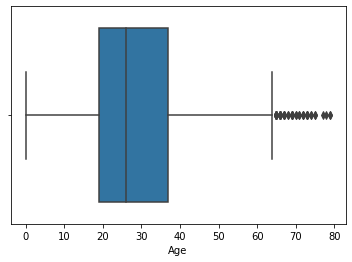

In [20]:
sns.boxplot(x = test['Age'])

In [21]:
space_titanic = train.append(test, ignore_index = True)
space_titanic

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [22]:
space_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


In [23]:
space_titanic.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [24]:
space_titanic.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [25]:
Passageiros = test.copy()
Passageiros

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [26]:
train_index = len(train)
train_index

8693

In [27]:
test_index = len(space_titanic) - len(test)
test_index

8693

DataFrame que receberá as features limpas

In [28]:
df = pd.DataFrame()

# Função Resumo

In [29]:
#a ideia é construir uma função onde sea apresetada o quadro resumo de valores unicos, sua quanitdade, o value counts, números nulos
# e um gráfico, com utilização de hue="Transported" para analisar como cada coluna se comportou com o sumiço dos passageiros

In [30]:
def relatorio_space(dados, coluna, count = True):
  print(f'Quantidade de números únicos: {dados[coluna].nunique()}')
  print(f'Quais são esses valores únicos: {dados[coluna].unique()}')
  print(f'Quantos são os valores nulos: {dados[coluna].isnull().sum()}')
  print(f'Quantidade por valores únicos:\n{dados[coluna].value_counts()}')

  if count == True:
    sns.countplot(data = dados, x = coluna, hue='Transported')
  else:
    sns.displot(dados[coluna], hue='Transported')

# HomePlanet

Quantidade de números únicos: 3
Quais são esses valores únicos: ['Europa' 'Earth' 'Mars' nan]
Quantos são os valores nulos: 288
Quantidade por valores únicos:
Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64


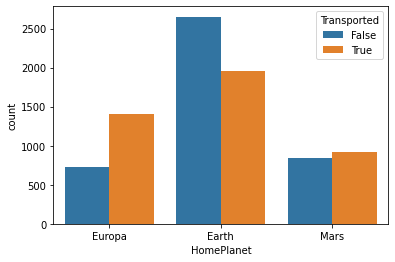

In [31]:
relatorio_space(space_titanic, "HomePlanet")

In [32]:
space_titanic[(space_titanic['HomePlanet'] != 'Earth') & (space_titanic['HomePlanet'] != 'Europa') & (space_titanic['HomePlanet'] != 'Mars')]['Destination'].value_counts()

TRAPPIST-1e      206
55 Cancri e       53
PSO J318.5-22     23
Name: Destination, dtype: int64

In [33]:
space_titanic['Destination'].isnull().sum()

274

In [34]:
space_titanic[space_titanic['HomePlanet'] == 'Earth']['Destination'].value_counts()

TRAPPIST-1e      4672
PSO J318.5-22    1065
55 Cancri e       984
Name: Destination, dtype: int64

In [35]:
space_titanic[space_titanic['HomePlanet'] == 'Europa']['Destination'].value_counts()

TRAPPIST-1e      1737
55 Cancri e      1310
PSO J318.5-22      29
Name: Destination, dtype: int64

In [36]:
space_titanic[space_titanic['HomePlanet'] == 'Mars']['Destination'].value_counts()

TRAPPIST-1e      2256
55 Cancri e       294
PSO J318.5-22      67
Name: Destination, dtype: int64

In [37]:
space_titanic['HomePlanet'].fillna("Earth", inplace = True)

In [38]:
space_titanic['HomePlanet'].isnull().sum()

0

In [39]:
df['HomePlanet'] = space_titanic['HomePlanet']
df

,HomePlanet
0,Europa
1,Earth
2,Europa
3,Europa
4,Earth
...,...
12965,Earth
12966,Earth
12967,Mars
12968,Europa


# CryoSleep

Quantidade de números únicos: 2
Quais são esses valores únicos: [False True nan]
Quantos são os valores nulos: 310
Quantidade por valores únicos:
False    8079
True     4581
Name: CryoSleep, dtype: int64


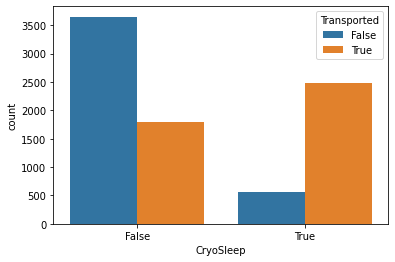

In [40]:
relatorio_space(space_titanic, "CryoSleep")

In [41]:
space_titanic['CryoSleep'] = space_titanic['CryoSleep'].apply(lambda linha: 0 if linha == False else (1 if linha == True else 3))
space_titanic['CryoSleep']

0        0
1        0
2        0
3        0
4        0
        ..
12965    1
12966    0
12967    1
12968    0
12969    1
Name: CryoSleep, Length: 12970, dtype: int64

In [42]:
space_titanic[space_titanic['CryoSleep'] == 3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
92,0099_02,Earth,3,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True
98,0105_01,Earth,3,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False
104,0110_02,Europa,3,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False
111,0115_01,Mars,3,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True
152,0173_01,Earth,3,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12688,8705_01,Mars,3,F/1790/P,55 Cancri e,20.0,False,0.0,0.0,0.0,0.0,0.0,Anch Gen,NaN
12801,8925_06,Europa,3,C/295/P,TRAPPIST-1e,27.0,False,0.0,2182.0,7.0,2582.0,19.0,Zedarga Pabler,NaN
12902,9138_01,Europa,3,NaN,TRAPPIST-1e,41.0,False,0.0,1998.0,0.0,1023.0,867.0,Misamak Trupistic,NaN
12923,9182_01,Earth,3,F/1776/S,TRAPPIST-1e,14.0,False,0.0,0.0,NaN,1377.0,29.0,Garyan Gainebergan,NaN


In [43]:
space_titanic[space_titanic['CryoSleep'] == 3]['HomePlanet'].value_counts()

Earth     168
Europa     81
Mars       61
Name: HomePlanet, dtype: int64

In [44]:
space_titanic[space_titanic['CryoSleep'] == 0]['HomePlanet'].value_counts()

Earth     4812
Europa    1678
Mars      1589
Name: HomePlanet, dtype: int64

In [45]:
space_titanic[space_titanic['CryoSleep'] == 1]['HomePlanet'].value_counts()

Earth     2173
Europa    1374
Mars      1034
Name: HomePlanet, dtype: int64

In [46]:
space_titanic['CryoSleep'] = space_titanic['CryoSleep'].apply(lambda linha: 0 if linha == 3 else linha)
space_titanic['CryoSleep']

0        0
1        0
2        0
3        0
4        0
        ..
12965    1
12966    0
12967    1
12968    0
12969    1
Name: CryoSleep, Length: 12970, dtype: int64

In [47]:
df['CryoSleep'] = space_titanic['CryoSleep']
df

,HomePlanet,CryoSleep
0,Europa,0
1,Earth,0
2,Europa,0
3,Europa,0
4,Earth,0
...,...,...
12965,Earth,1
12966,Earth,0
12967,Mars,1
12968,Europa,0


In [48]:
space_titanic

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,0,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,1,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,0,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


# Cabin

In [49]:
#relatorio_space(space_titanic, 'Cabin')

In [50]:
#cortando deck e lado de cabine
space_titanic[['Deck', 'Num', 'Side']] = space_titanic['Cabin'].str.split('/', expand = True)

In [51]:
space_titanic

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,1496,S
12966,9269_01,Earth,0,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN,NaN
12967,9271_01,Mars,1,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,296,P
12968,9273_01,Europa,0,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,297,P


In [52]:
space_titanic.drop(['Num', 'Cabin'], axis = 1, inplace = True)

In [53]:
space_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,S
12966,9269_01,Earth,0,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN
12967,9271_01,Mars,1,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,P
12968,9273_01,Europa,0,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,P


# Destination

Quantidade de números únicos: 3
Quais são esses valores únicos: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Quantos são os valores nulos: 274
Quantidade por valores únicos:
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64


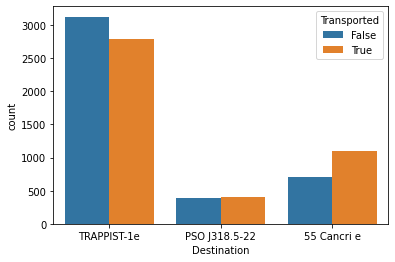

In [54]:
relatorio_space(space_titanic, 'Destination')

In [55]:
space_titanic[space_titanic['Destination'] == 'TRAPPIST-1e']['HomePlanet'].value_counts()

Earth     4878
Mars      2256
Europa    1737
Name: HomePlanet, dtype: int64

In [56]:
space_titanic[space_titanic['Destination'] == 'PSO J318.5-22']['HomePlanet'].value_counts()

Earth     1088
Mars        67
Europa      29
Name: HomePlanet, dtype: int64

In [57]:
space_titanic[space_titanic['Destination'] == '55 Cancri e']['HomePlanet'].value_counts()

Europa    1310
Earth     1037
Mars       294
Name: HomePlanet, dtype: int64

In [58]:
space_titanic[(space_titanic['Destination'] != 'TRAPPIST-1e') & (space_titanic['Destination'] != 'PSO J318.5-22') & (space_titanic['Destination'] != '55 Cancri e')]['HomePlanet'].value_counts()

Earth     150
Mars       67
Europa     57
Name: HomePlanet, dtype: int64

In [59]:
space_titanic['Destination'].fillna('TRAPPIST-1e', inplace = True)


In [60]:
space_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,S
12966,9269_01,Earth,0,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN
12967,9271_01,Mars,1,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,P
12968,9273_01,Europa,0,TRAPPIST-1e,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,P


In [61]:
df['Destination'] = space_titanic['Destination']
df

,HomePlanet,CryoSleep,Destination
0,Europa,0,TRAPPIST-1e
1,Earth,0,TRAPPIST-1e
2,Europa,0,TRAPPIST-1e
3,Europa,0,TRAPPIST-1e
4,Earth,0,TRAPPIST-1e
...,...,...,...
12965,Earth,1,TRAPPIST-1e
12966,Earth,0,TRAPPIST-1e
12967,Mars,1,55 Cancri e
12968,Europa,0,TRAPPIST-1e


# Age

Quantidade de números únicos: 80
Quais são esses valores únicos: [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
Quantos são os valores nulos: 270
Quantidade por valores únicos:
18.0    496
24.0    482
21.0    468
19.0    455
22.0    454
       ... 
75.0      6
79.0      5
78.0      4
77.0      3
76.0      2
Name: Age, Length: 80, dtype: int64


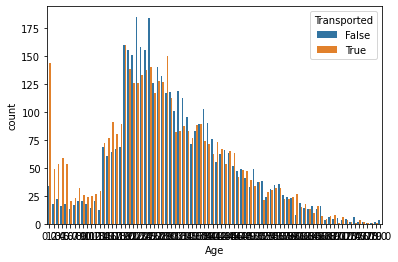

In [62]:
relatorio_space(space_titanic, 'Age')

In [63]:
space_titanic['Age'].isnull().sum()

270

In [64]:
space_titanic[space_titanic['HomePlanet'] == 'Earth']['Age'].mean()

26.085482262430546

In [65]:
space_titanic[space_titanic['HomePlanet'] == 'Europa']['Age'].mean()

34.33615911313988

In [66]:
space_titanic[space_titanic['HomePlanet'] == 'Mars']['Age'].mean()

29.45715378729916

In [67]:
for c in space_titanic.index:
  if pd.isnull(space_titanic['Age'][c]):
    if space_titanic['HomePlanet'][c] == 'Earth':
      space_titanic['Age'][c] = round(space_titanic[space_titanic['HomePlanet'] == 'Earth']['Age'].mean(), 2)
    elif space_titanic['HomePlanet'][c] == 'Europa':
      space_titanic['Age'][c] = round(space_titanic[space_titanic['HomePlanet'] == 'Europa']['Age'].mean(), 2)
    elif space_titanic['HomePlanet'][c] == 'Mars':
      space_titanic['Age'][c] = round(space_titanic[space_titanic['HomePlanet'] == 'Mars']['Age'].mean(), 2)

  else:
    continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
df['Age'] = space_titanic['Age']
df

,HomePlanet,CryoSleep,Destination,Age
0,Europa,0,TRAPPIST-1e,39.00
1,Earth,0,TRAPPIST-1e,24.00
2,Europa,0,TRAPPIST-1e,58.00
3,Europa,0,TRAPPIST-1e,33.00
4,Earth,0,TRAPPIST-1e,16.00
...,...,...,...,...
12965,Earth,1,TRAPPIST-1e,34.00
12966,Earth,0,TRAPPIST-1e,42.00
12967,Mars,1,55 Cancri e,29.46
12968,Europa,0,TRAPPIST-1e,34.34


In [69]:
space_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.00,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,0,TRAPPIST-1e,24.00,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,0,TRAPPIST-1e,58.00,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,0,TRAPPIST-1e,33.00,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,0,TRAPPIST-1e,16.00,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1,TRAPPIST-1e,34.00,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,S
12966,9269_01,Earth,0,TRAPPIST-1e,42.00,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN
12967,9271_01,Mars,1,55 Cancri e,29.46,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,P
12968,9273_01,Europa,0,TRAPPIST-1e,34.34,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,P


# VIP

Quantidade de números únicos: 2
Quais são esses valores únicos: [False True nan]
Quantos são os valores nulos: 296
Quantidade por valores únicos:
False    12401
True       273
Name: VIP, dtype: int64


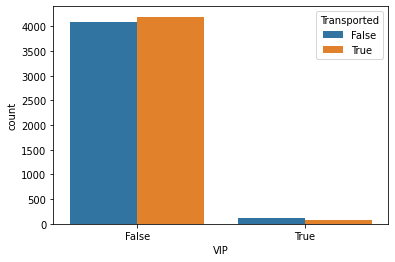

In [70]:
relatorio_space(space_titanic, 'VIP')

In [71]:
space_titanic[space_titanic['VIP'] == True]['HomePlanet'].value_counts()

Europa    177
Mars       90
Earth       6
Name: HomePlanet, dtype: int64

In [72]:
space_titanic[space_titanic['VIP'] == True]['Destination'].value_counts()

TRAPPIST-1e      166
55 Cancri e       85
PSO J318.5-22     22
Name: Destination, dtype: int64

In [73]:
space_titanic[(space_titanic['VIP'] != True) & (space_titanic['VIP'] != False)]['HomePlanet'].value_counts()

Earth     162
Europa     73
Mars       61
Name: HomePlanet, dtype: int64

In [74]:
space_titanic['VIP'].fillna(False, inplace = True)

In [75]:
space_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.00,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,0,TRAPPIST-1e,24.00,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,0,TRAPPIST-1e,58.00,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,0,TRAPPIST-1e,33.00,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,0,TRAPPIST-1e,16.00,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1,TRAPPIST-1e,34.00,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,S
12966,9269_01,Earth,0,TRAPPIST-1e,42.00,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN
12967,9271_01,Mars,1,55 Cancri e,29.46,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,P
12968,9273_01,Europa,0,TRAPPIST-1e,34.34,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,P


In [76]:
space_titanic['VIP'] = space_titanic['VIP'].apply(lambda linha: 0 if linha == False else 1)
space_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.00,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,0,TRAPPIST-1e,24.00,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,0,TRAPPIST-1e,58.00,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,0,TRAPPIST-1e,33.00,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,0,TRAPPIST-1e,16.00,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1,TRAPPIST-1e,34.00,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,S
12966,9269_01,Earth,0,TRAPPIST-1e,42.00,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN
12967,9271_01,Mars,1,55 Cancri e,29.46,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,P
12968,9273_01,Europa,0,TRAPPIST-1e,34.34,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,P


In [77]:
df['VIP'] = space_titanic['VIP']
df

,HomePlanet,CryoSleep,Destination,Age,VIP
0,Europa,0,TRAPPIST-1e,39.00,0
1,Earth,0,TRAPPIST-1e,24.00,0
2,Europa,0,TRAPPIST-1e,58.00,1
3,Europa,0,TRAPPIST-1e,33.00,0
4,Earth,0,TRAPPIST-1e,16.00,0
...,...,...,...,...,...
12965,Earth,1,TRAPPIST-1e,34.00,0
12966,Earth,0,TRAPPIST-1e,42.00,0
12967,Mars,1,55 Cancri e,29.46,0
12968,Europa,0,TRAPPIST-1e,34.34,0


# RoomService,	FoodCourt,	ShoppingMall,	Spa,	VRDeck

In [78]:
#ideia aqui é colocar zero nos valores nulos e criar uma nova coluna somando tudo

In [79]:
space_titanic.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
Deck             299
Side             299
dtype: int64

In [80]:
space_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.00,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,0,TRAPPIST-1e,24.00,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,0,TRAPPIST-1e,58.00,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,0,TRAPPIST-1e,33.00,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,0,TRAPPIST-1e,16.00,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1,TRAPPIST-1e,34.00,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,S
12966,9269_01,Earth,0,TRAPPIST-1e,42.00,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN
12967,9271_01,Mars,1,55 Cancri e,29.46,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,P
12968,9273_01,Europa,0,TRAPPIST-1e,34.34,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,P


In [81]:
 space_titanic['RoomService'].fillna(0, inplace = True)
 space_titanic['FoodCourt'].fillna(0, inplace = True) 
 space_titanic['ShoppingMall'].fillna(0, inplace = True) 
 space_titanic['Spa'].fillna(0, inplace = True) 
 space_titanic['VRDeck'].fillna(0, inplace = True)

In [82]:
space_titanic['Total'] = space_titanic['RoomService'] + space_titanic['FoodCourt'] + space_titanic['ShoppingMall'] + space_titanic['Spa'] + space_titanic['VRDeck']
space_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side,Total
0,0001_01,Europa,0,TRAPPIST-1e,39.00,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,0.0
1,0002_01,Earth,0,TRAPPIST-1e,24.00,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,736.0
2,0003_01,Europa,0,TRAPPIST-1e,58.00,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,10383.0
3,0003_02,Europa,0,TRAPPIST-1e,33.00,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,5176.0
4,0004_01,Earth,0,TRAPPIST-1e,16.00,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1,TRAPPIST-1e,34.00,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,S,0.0
12966,9269_01,Earth,0,TRAPPIST-1e,42.00,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN,1018.0
12967,9271_01,Mars,1,55 Cancri e,29.46,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,P,0.0
12968,9273_01,Europa,0,TRAPPIST-1e,34.34,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,P,3203.0


In [83]:
df['Total'] = space_titanic['Total']
df

,HomePlanet,CryoSleep,Destination,Age,VIP,Total
0,Europa,0,TRAPPIST-1e,39.00,0,0.0
1,Earth,0,TRAPPIST-1e,24.00,0,736.0
2,Europa,0,TRAPPIST-1e,58.00,1,10383.0
3,Europa,0,TRAPPIST-1e,33.00,0,5176.0
4,Earth,0,TRAPPIST-1e,16.00,0,1091.0
...,...,...,...,...,...,...
12965,Earth,1,TRAPPIST-1e,34.00,0,0.0
12966,Earth,0,TRAPPIST-1e,42.00,0,1018.0
12967,Mars,1,55 Cancri e,29.46,0,0.0
12968,Europa,0,TRAPPIST-1e,34.34,0,3203.0


In [84]:
df['Total'].isnull().sum()

0

In [85]:
#dropando as colunas individuais de gastos
space_titanic.drop(['RoomService',	'FoodCourt',	'ShoppingMall',	'Spa', 'VRDeck'], axis = 1, inplace = True)
space_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Deck,Side,Total
0,0001_01,Europa,0,TRAPPIST-1e,39.00,0,Maham Ofracculy,False,B,P,0.0
1,0002_01,Earth,0,TRAPPIST-1e,24.00,0,Juanna Vines,True,F,S,736.0
2,0003_01,Europa,0,TRAPPIST-1e,58.00,1,Altark Susent,False,A,S,10383.0
3,0003_02,Europa,0,TRAPPIST-1e,33.00,0,Solam Susent,False,A,S,5176.0
4,0004_01,Earth,0,TRAPPIST-1e,16.00,0,Willy Santantines,True,F,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1,TRAPPIST-1e,34.00,0,Jeron Peter,NaN,G,S,0.0
12966,9269_01,Earth,0,TRAPPIST-1e,42.00,0,Matty Scheron,NaN,NaN,NaN,1018.0
12967,9271_01,Mars,1,55 Cancri e,29.46,0,Jayrin Pore,NaN,D,P,0.0
12968,9273_01,Europa,0,TRAPPIST-1e,34.34,0,Kitakan Conale,NaN,D,P,3203.0


# Name

In [86]:
#analisando a coluna name, nota-se que a mesma não possui titulos dos cidadãos, portanto, pode ser excluido, pois não remete a uma feature

In [87]:
space_titanic.drop('Name', axis = 1, inplace = True)

In [88]:
space_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Side,Total
0,0001_01,Europa,0,TRAPPIST-1e,39.00,0,False,B,P,0.0
1,0002_01,Earth,0,TRAPPIST-1e,24.00,0,True,F,S,736.0
2,0003_01,Europa,0,TRAPPIST-1e,58.00,1,False,A,S,10383.0
3,0003_02,Europa,0,TRAPPIST-1e,33.00,0,False,A,S,5176.0
4,0004_01,Earth,0,TRAPPIST-1e,16.00,0,True,F,S,1091.0
...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1,TRAPPIST-1e,34.00,0,NaN,G,S,0.0
12966,9269_01,Earth,0,TRAPPIST-1e,42.00,0,NaN,NaN,NaN,1018.0
12967,9271_01,Mars,1,55 Cancri e,29.46,0,NaN,D,P,0.0
12968,9273_01,Europa,0,TRAPPIST-1e,34.34,0,NaN,D,P,3203.0


# Deck

In [89]:
#deck, é fruto do split da coluna "Cabin", onde essa última foi dividida entre deck, num e lado.
#Numero foi excluido, ficando deck e lado

Quantidade de números únicos: 8
Quais são esses valores únicos: ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
Quantos são os valores nulos: 299
Quantidade por valores únicos:
F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: Deck, dtype: int64


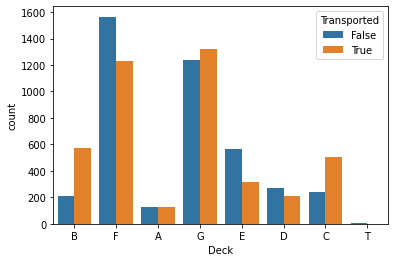

In [90]:
relatorio_space(space_titanic, 'Deck')

In [91]:
#nota-se que, em números aboslutos, o deck "G" foi onde mais passageiros foram transportados, seguido pelo deck "F"
#em termos proporcionais os deck "C" e "B", principalmente esse último.
#299 valores nulos, necessitam de adequações, buscando encontrar um padrão

In [92]:
space_titanic['Deck'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], [0, 1, 2, 3, 4, 5, 6, 7], inplace = True)

In [93]:
#space_titanic['Deck'].fillna(8, inplace = True)

In [94]:
space_titanic[space_titanic['Deck'] == 0]['HomePlanet'].value_counts()

Europa    346
Earth       8
Name: HomePlanet, dtype: int64

In [95]:
space_titanic[space_titanic['Deck'] == 1]['HomePlanet'].value_counts()

Europa    1124
Earth       17
Name: HomePlanet, dtype: int64

In [96]:
space_titanic[space_titanic['Deck'] == 2]['HomePlanet'].value_counts()

Europa    1081
Earth       21
Name: HomePlanet, dtype: int64

In [97]:
space_titanic[space_titanic['Deck'] == 3]['HomePlanet'].value_counts()

Mars      406
Europa    296
Earth      18
Name: HomePlanet, dtype: int64

In [98]:
space_titanic[space_titanic['Deck'] == 4]['HomePlanet'].value_counts()

Earth     618
Mars      508
Europa    197
Name: HomePlanet, dtype: int64

In [99]:
space_titanic[space_titanic['Deck'] == 5]['HomePlanet'].value_counts()

Earth    2526
Mars     1713
Name: HomePlanet, dtype: int64

In [100]:
space_titanic[space_titanic['Deck'] == 6]['HomePlanet'].value_counts()

Earth    3781
Name: HomePlanet, dtype: int64

In [101]:
space_titanic[space_titanic['Deck'] == 7]['HomePlanet'].value_counts()

Europa    10
Earth      1
Name: HomePlanet, dtype: int64

In [102]:
space_titanic[space_titanic['Deck'] == 8]['HomePlanet'].value_counts()

Series([], Name: HomePlanet, dtype: int64)

In [103]:
#se veio da terra, entao chance maior de ser 6
#se veio da europa, entao a chance maior de ser 1
#se veio de mars, entao a chance é maior de ser 3

In [104]:
space_titanic[space_titanic['Deck'] == 8]['Destination'].value_counts()

Series([], Name: Destination, dtype: int64)

In [105]:
for c in space_titanic.index:
  if pd.isnull(space_titanic['Deck'][c]):
    if space_titanic['HomePlanet'][c] == 'Earth':
      space_titanic['Deck'][c] = 6
    elif space_titanic['HomePlanet'][c] == 'Europa':
      space_titanic['Deck'][c] = 1
    elif space_titanic['HomePlanet'][c] == 'Mars':
      space_titanic['Deck'][c] = 3
  else:
    continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [106]:
space_titanic['Deck'].isnull().sum()

0

In [107]:
space_titanic['Deck'] = space_titanic['Deck'].astype(int)

In [108]:
space_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Side,Total
0,0001_01,Europa,0,TRAPPIST-1e,39.00,0,False,1,P,0.0
1,0002_01,Earth,0,TRAPPIST-1e,24.00,0,True,5,S,736.0
2,0003_01,Europa,0,TRAPPIST-1e,58.00,1,False,0,S,10383.0
3,0003_02,Europa,0,TRAPPIST-1e,33.00,0,False,0,S,5176.0
4,0004_01,Earth,0,TRAPPIST-1e,16.00,0,True,5,S,1091.0
...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1,TRAPPIST-1e,34.00,0,NaN,6,S,0.0
12966,9269_01,Earth,0,TRAPPIST-1e,42.00,0,NaN,6,NaN,1018.0
12967,9271_01,Mars,1,55 Cancri e,29.46,0,NaN,3,P,0.0
12968,9273_01,Europa,0,TRAPPIST-1e,34.34,0,NaN,3,P,3203.0


In [109]:
df['Deck'] = space_titanic['Deck']
df

,HomePlanet,CryoSleep,Destination,Age,VIP,Total,Deck
0,Europa,0,TRAPPIST-1e,39.00,0,0.0,1
1,Earth,0,TRAPPIST-1e,24.00,0,736.0,5
2,Europa,0,TRAPPIST-1e,58.00,1,10383.0,0
3,Europa,0,TRAPPIST-1e,33.00,0,5176.0,0
4,Earth,0,TRAPPIST-1e,16.00,0,1091.0,5
...,...,...,...,...,...,...,...
12965,Earth,1,TRAPPIST-1e,34.00,0,0.0,6
12966,Earth,0,TRAPPIST-1e,42.00,0,1018.0,6
12967,Mars,1,55 Cancri e,29.46,0,0.0,3
12968,Europa,0,TRAPPIST-1e,34.34,0,3203.0,3


# Side

Quantidade de números únicos: 2
Quais são esses valores únicos: ['P' 'S' nan]
Quantos são os valores nulos: 299
Quantidade por valores únicos:
S    6381
P    6290
Name: Side, dtype: int64


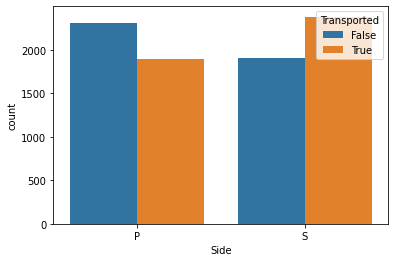

In [110]:
relatorio_space(space_titanic, 'Side')

In [111]:
#lado "S" com mais tendência de ser transportado

In [112]:
space_titanic['Side'].replace(['P', 'S'], [0, 1], inplace = True)

In [113]:
#space_titanic['Side'].fillna(2, inplace = True)

In [114]:
space_titanic[space_titanic['Side'] == 0]['HomePlanet'].value_counts()

Earth     3510
Europa    1450
Mars      1330
Name: HomePlanet, dtype: int64

In [115]:
space_titanic[space_titanic['Side'] == 1]['HomePlanet'].value_counts()

Earth     3480
Europa    1604
Mars      1297
Name: HomePlanet, dtype: int64

In [116]:
space_titanic[space_titanic['Side'] == 2]['HomePlanet'].value_counts()

Series([], Name: HomePlanet, dtype: int64)

In [117]:
for c in space_titanic.index:
  if pd.isnull(space_titanic['Side'][c]):
    if space_titanic['HomePlanet'][c] == 'Earth':
      space_titanic['Side'][c] = 1
    elif space_titanic['HomePlanet'][c] == 'Europa':
      space_titanic['Side'][c] = 0
    elif space_titanic['HomePlanet'][c] == 'Mars':
      space_titanic['Side'][c] = 0
  else:
    continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [118]:
space_titanic['Side'] = space_titanic['Side'].astype(int)
space_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Side,Total
0,0001_01,Europa,0,TRAPPIST-1e,39.00,0,False,1,0,0.0
1,0002_01,Earth,0,TRAPPIST-1e,24.00,0,True,5,1,736.0
2,0003_01,Europa,0,TRAPPIST-1e,58.00,1,False,0,1,10383.0
3,0003_02,Europa,0,TRAPPIST-1e,33.00,0,False,0,1,5176.0
4,0004_01,Earth,0,TRAPPIST-1e,16.00,0,True,5,1,1091.0
...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1,TRAPPIST-1e,34.00,0,NaN,6,1,0.0
12966,9269_01,Earth,0,TRAPPIST-1e,42.00,0,NaN,6,1,1018.0
12967,9271_01,Mars,1,55 Cancri e,29.46,0,NaN,3,0,0.0
12968,9273_01,Europa,0,TRAPPIST-1e,34.34,0,NaN,3,0,3203.0


In [119]:
df['Side'] = space_titanic['Side']

In [120]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,Total,Deck,Side
0,Europa,0,TRAPPIST-1e,39.00,0,0.0,1,0
1,Earth,0,TRAPPIST-1e,24.00,0,736.0,5,1
2,Europa,0,TRAPPIST-1e,58.00,1,10383.0,0,1
3,Europa,0,TRAPPIST-1e,33.00,0,5176.0,0,1
4,Earth,0,TRAPPIST-1e,16.00,0,1091.0,5,1
...,...,...,...,...,...,...,...,...
12965,Earth,1,TRAPPIST-1e,34.00,0,0.0,6,1
12966,Earth,0,TRAPPIST-1e,42.00,0,1018.0,6,1
12967,Mars,1,55 Cancri e,29.46,0,0.0,3,0
12968,Europa,0,TRAPPIST-1e,34.34,0,3203.0,3,0


In [121]:
space_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Side,Total
0,0001_01,Europa,0,TRAPPIST-1e,39.00,0,False,1,0,0.0
1,0002_01,Earth,0,TRAPPIST-1e,24.00,0,True,5,1,736.0
2,0003_01,Europa,0,TRAPPIST-1e,58.00,1,False,0,1,10383.0
3,0003_02,Europa,0,TRAPPIST-1e,33.00,0,False,0,1,5176.0
4,0004_01,Earth,0,TRAPPIST-1e,16.00,0,True,5,1,1091.0
...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,1,TRAPPIST-1e,34.00,0,NaN,6,1,0.0
12966,9269_01,Earth,0,TRAPPIST-1e,42.00,0,NaN,6,1,1018.0
12967,9271_01,Mars,1,55 Cancri e,29.46,0,NaN,3,0,0.0
12968,9273_01,Europa,0,TRAPPIST-1e,34.34,0,NaN,3,0,3203.0


# PassengerId

In [122]:
space_titanic['PassengerId'].nunique()

12970

In [123]:
#relatorio_space(space_titanic, 'PassengerId')
#sem valores nulos

In [124]:
#a ideia aqui é a de separar o grupo dos passageiros, grupo refere-se ao primeiros 4 digitos, os usuários são os 2 últimos

In [125]:
space_titanic[['GroupId','PassengerId']] = space_titanic['PassengerId'].str.split('_', expand = True)
space_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Side,Total,GroupId
0,01,Europa,0,TRAPPIST-1e,39.00,0,False,1,0,0.0,0001
1,01,Earth,0,TRAPPIST-1e,24.00,0,True,5,1,736.0,0002
2,01,Europa,0,TRAPPIST-1e,58.00,1,False,0,1,10383.0,0003
3,02,Europa,0,TRAPPIST-1e,33.00,0,False,0,1,5176.0,0003
4,01,Earth,0,TRAPPIST-1e,16.00,0,True,5,1,1091.0,0004
...,...,...,...,...,...,...,...,...,...,...,...
12965,02,Earth,1,TRAPPIST-1e,34.00,0,NaN,6,1,0.0,9266
12966,01,Earth,0,TRAPPIST-1e,42.00,0,NaN,6,1,1018.0,9269
12967,01,Mars,1,55 Cancri e,29.46,0,NaN,3,0,0.0,9271
12968,01,Europa,0,TRAPPIST-1e,34.34,0,NaN,3,0,3203.0,9273


In [126]:
space_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Side,Total,GroupId
0,01,Europa,0,TRAPPIST-1e,39.00,0,False,1,0,0.0,0001
1,01,Earth,0,TRAPPIST-1e,24.00,0,True,5,1,736.0,0002
2,01,Europa,0,TRAPPIST-1e,58.00,1,False,0,1,10383.0,0003
3,02,Europa,0,TRAPPIST-1e,33.00,0,False,0,1,5176.0,0003
4,01,Earth,0,TRAPPIST-1e,16.00,0,True,5,1,1091.0,0004
...,...,...,...,...,...,...,...,...,...,...,...
12965,02,Earth,1,TRAPPIST-1e,34.00,0,NaN,6,1,0.0,9266
12966,01,Earth,0,TRAPPIST-1e,42.00,0,NaN,6,1,1018.0,9269
12967,01,Mars,1,55 Cancri e,29.46,0,NaN,3,0,0.0,9271
12968,01,Europa,0,TRAPPIST-1e,34.34,0,NaN,3,0,3203.0,9273


In [127]:
df['GroupId'] = space_titanic['GroupId']
df

,HomePlanet,CryoSleep,Destination,Age,VIP,Total,Deck,Side,GroupId
0,Europa,0,TRAPPIST-1e,39.00,0,0.0,1,0,0001
1,Earth,0,TRAPPIST-1e,24.00,0,736.0,5,1,0002
2,Europa,0,TRAPPIST-1e,58.00,1,10383.0,0,1,0003
3,Europa,0,TRAPPIST-1e,33.00,0,5176.0,0,1,0003
4,Earth,0,TRAPPIST-1e,16.00,0,1091.0,5,1,0004
...,...,...,...,...,...,...,...,...,...
12965,Earth,1,TRAPPIST-1e,34.00,0,0.0,6,1,9266
12966,Earth,0,TRAPPIST-1e,42.00,0,1018.0,6,1,9269
12967,Mars,1,55 Cancri e,29.46,0,0.0,3,0,9271
12968,Europa,0,TRAPPIST-1e,34.34,0,3203.0,3,0,9273


# Separando Colunas Numéricas das Categóricas

In [128]:
space_titanic.drop('PassengerId', axis = 1, inplace = True)

In [129]:
for c in space_titanic.columns:
  print(f'{c}: {space_titanic[c].nunique()} ')

HomePlanet: 3 
CryoSleep: 2 
Destination: 3 
Age: 83 
VIP: 2 
Transported: 2 
Deck: 8 
Side: 2 
Total: 2980 
GroupId: 9280 


In [130]:
colunas_numericas = ["Age", "Total", "GroupId"]
colunas_categoricas = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

In [131]:
space_titanic_completo = pd.get_dummies(space_titanic, columns = colunas_categoricas)
space_titanic_completo

,Age,Transported,Total,GroupId,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_0,CryoSleep_1,Destination_55 Cancri e,...,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Side_0,Side_1
0,39.00,False,0.0,0001,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,24.00,True,736.0,0002,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,58.00,False,10383.0,0003,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,33.00,False,5176.0,0003,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,16.00,True,1091.0,0004,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,34.00,NaN,0.0,9266,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
12966,42.00,NaN,1018.0,9269,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
12967,29.46,NaN,0.0,9271,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
12968,34.34,NaN,3203.0,9273,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


# Separar dataframe do que é de treino e de teste

In [132]:
len(train)

8693

In [133]:
len(test)

4277

In [134]:
train_index

8693

In [135]:
test_index

8693

In [136]:
train = space_titanic_completo[:train_index].copy()

In [137]:
test = space_titanic_completo[test_index:].copy()

In [138]:
train

,Age,Transported,Total,GroupId,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_0,CryoSleep_1,Destination_55 Cancri e,...,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Side_0,Side_1
0,39.0,False,0.0,0001,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,24.0,True,736.0,0002,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,58.0,False,10383.0,0003,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,33.0,False,5176.0,0003,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,True,1091.0,0004,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,False,8536.0,9276,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
8689,18.0,False,0.0,9278,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
8690,26.0,True,1873.0,9279,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
8691,32.0,False,4637.0,9280,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


In [139]:
test

,Age,Transported,Total,GroupId,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_0,CryoSleep_1,Destination_55 Cancri e,...,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Side_0,Side_1
8693,27.00,NaN,0.0,0013,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
8694,19.00,NaN,2832.0,0018,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
8695,31.00,NaN,0.0,0019,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
8696,38.00,NaN,7418.0,0021,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8697,20.00,NaN,645.0,0023,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,34.00,NaN,0.0,9266,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
12966,42.00,NaN,1018.0,9269,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
12967,29.46,NaN,0.0,9271,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
12968,34.34,NaN,3203.0,9273,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


# Separando variáveis alvos, features e últimas limpezas

In [140]:
X = train.drop('Transported', axis = 1)
y = train['Transported']

In [141]:
X

,Age,Total,GroupId,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_0,CryoSleep_1,Destination_55 Cancri e,Destination_PSO J318.5-22,...,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Side_0,Side_1
0,39.0,0.0,0001,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,24.0,736.0,0002,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,58.0,10383.0,0003,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,33.0,5176.0,0003,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,1091.0,0004,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,8536.0,9276,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,9278,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
8690,26.0,1873.0,9279,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8691,32.0,4637.0,9280,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [142]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: object

In [143]:
y.astype(int)

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [144]:
y = y.astype(int)

In [145]:
X_test = test.drop('Transported', axis = 1)

In [146]:
X_test

,Age,Total,GroupId,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_0,CryoSleep_1,Destination_55 Cancri e,Destination_PSO J318.5-22,...,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Side_0,Side_1
8693,27.00,0.0,0013,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
8694,19.00,2832.0,0018,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8695,31.00,0.0,0019,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
8696,38.00,7418.0,0021,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8697,20.00,645.0,0023,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,34.00,0.0,9266,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
12966,42.00,1018.0,9269,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
12967,29.46,0.0,9271,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
12968,34.34,3203.0,9273,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [147]:
#dados supostamente arrumados.

# Machine Learning

In [148]:
#importando as bibliotecas

In [149]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [150]:
!pip install catboost
import catboost
from catboost import CatBoostClassifier, Pool, cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Primeira Função

In [151]:
def funcao_acuracia(modelo, X_train, y_train, vc):
  machine = modelo.fit(X_train, y_train)
  acuracia = round(machine.score(X_train, y_train), 2)

  train_predicao = model_selection.cross_val_predict(modelo, X_train, y_train, cv = vc, n_jobs = -1)
  acuracia_vc = round(metrics.accuracy_score(y_train, train_predicao), 2)

  return acuracia, acuracia_vc

In [152]:
#random forest
acc_rf, acc_cv_rf = funcao_acuracia(RandomForestClassifier(), X, y, 10)

print(f'Acurácia: {acc_rf}')
print(f'Acurácia validação cruzada: {acc_cv_rf}')

Acurácia: 1.0
Acurácia validação cruzada: 0.72


In [153]:
#logistc regression
acc_lg, acc_cv_lg = funcao_acuracia(LogisticRegression(), X, y, 10)

print(f'Acurácia: {acc_lg}')
print(f'Acurácia validação cruzada: {acc_cv_lg}')

Acurácia: 0.72
Acurácia validação cruzada: 0.73


In [154]:
# k-Neurest Neighbours
acc_kn, acc_cv_kn = funcao_acuracia(KNeighborsClassifier(), X, y, 10)

print(f'Acurácia: {acc_kn}')
print(f'Acurácia validação cruzada: {acc_cv_kn}')

Acurácia: 0.77
Acurácia validação cruzada: 0.46


In [155]:
# Gaussian Naive Bayes
acc_gauss, acc_cv_gauss = funcao_acuracia(GaussianNB(), X, y, 10)

print(f'Acurácia: {acc_gauss}')
print(f'Acurácia validação cruzada: {acc_cv_gauss}')

Acurácia: 0.72
Acurácia validação cruzada: 0.71


In [156]:
# SVC Linear support vector machines
acc_svc, acc_cv_svc = funcao_acuracia(LinearSVC(), X, y, 10)

print(f'Acurácia: {acc_svc}')
print(f'Acurácia validação cruzada: {acc_cv_svc}')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Acurácia: 0.6
Acurácia validação cruzada: 0.59


In [157]:
# Stochatics gradient descent
acc_descent, acc_cv_descent = funcao_acuracia(SGDClassifier(), X, y, 10)

print(f'Acurácia: {acc_descent}')
print(f'Acurácia validação cruzada: {acc_cv_descent}')

Acurácia: 0.52
Acurácia validação cruzada: 0.55


In [158]:
#decision tree classifier
acc_tree, acc_cv_tree = funcao_acuracia(DecisionTreeClassifier(),X, y, 10)

print(f'Acurácia: {acc_tree}')
print(f'Acurácia validação cruzada: {acc_cv_tree}')

Acurácia: 1.0
Acurácia validação cruzada: 0.61


In [159]:
#gradient boost classifier

acc_gradient, acc_vc_gradient = funcao_acuracia(GradientBoostingClassifier(), X, y, 10)

print(f'Acurácia: {acc_gradient}')
print(f'Acurácia validaçao cruzada: {acc_vc_gradient}')

Acurácia: 0.76
Acurácia validaçao cruzada: 0.57


In [160]:
#esse último, teve a melhor acurácia de validação cruzada.
#usar esse modelo para o X_test

In [161]:
parametros = dict(
    max_depth = [n for n in range(1, 5)],
    min_samples_split = [n for n in range(2, 4)],
    min_samples_leaf = [n for n in range(2, 4)],
    n_estimators = [n for n in range(10, 30, 10)]
)

In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
gbc = GradientBoostingClassifier()

In [164]:
gbc_vc = GridSearchCV(estimator = gbc, param_grid = parametros, cv = 10)

In [165]:
gbc_vc.fit(X, y)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [10, 20]})

In [166]:
print(f'Melhor pontuação: {gbc_vc.best_score_:.2f}')
print(f'Melhores parâmetros: {gbc_vc.best_estimator_}')

Melhor pontuação: 0.74
Melhores parâmetros: GradientBoostingClassifier(min_samples_leaf=2, n_estimators=20)


In [167]:
X_test.isnull().sum()

Age                          0
Total                        0
GroupId                      0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_0                  0
CryoSleep_1                  0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_0                        0
VIP_1                        0
Deck_0                       0
Deck_1                       0
Deck_2                       0
Deck_3                       0
Deck_4                       0
Deck_5                       0
Deck_6                       0
Deck_7                       0
Side_0                       0
Side_1                       0
dtype: int64

In [168]:
predicao_com_X_test = gbc_vc.predict(X_test)
predicao_com_X_test

array([1, 0, 1, ..., 1, 0, 1])

# Segunda Função

In [169]:
#a ideia agora é usar o train_test_split

In [170]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.7)

In [171]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((6085, 23), (2608, 23), (6085,), (2608,))

In [172]:
X_train.shape

(6085, 23)

In [173]:
modeloml = LogisticRegression(max_iter=1000)

In [174]:
modeloml.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [175]:
predicao = modeloml.predict(X_valid)
predicao

array([1, 0, 1, ..., 0, 1, 0])

In [176]:
modeloml.score(X_train, y_train)

0.7291700903861955

In [177]:
modeloml.score(X_valid, y_valid)

0.7258435582822086

In [178]:
from sklearn.metrics import accuracy_score

In [179]:
accuracy_score(y_valid, predicao)

0.7258435582822086

In [180]:
from sklearn.metrics import classification_report

In [181]:
print(classification_report(y_valid, predicao))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      1308
           1       0.77      0.65      0.70      1300

    accuracy                           0.73      2608
   macro avg       0.73      0.73      0.72      2608
weighted avg       0.73      0.73      0.72      2608



In [182]:
from sklearn.metrics import confusion_matrix

In [183]:
confusion_matrix(y_valid, predicao)

array([[1053,  255],
       [ 460,  840]])

In [184]:
train['Transported'] = train['Transported'].astype(int)

In [185]:
def relatorio_space(df, machine, opt = 2):
  X = df.drop('Transported', axis = 1)
  y = df['Transported']

  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

  if opt == 0:
    ml = machine(max_iter = 1000)
  elif opt == 1:
    ml = machine(n_estimators = 1000)
  elif opt == 2:
    ml = machine()

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f'Acurácia treino: {score_train * 100:.2f}%')
  score_valid = ml.score(X_valid, y_valid)
  print(f'Acurácia validação cruzada: {score_valid * 100:.2f}%')

  preds = ml.predict(X_valid)
  print('====Classification Report====')
  print(classification_report(y_valid, preds))

  print('====Confusion Matrix====')
  print(confusion_matrix(y_valid, preds))

  #sns.heatmap(confusão, annot = True)

  return score_train, score_valid

In [186]:
#logistic regression

acc_train, acc_valid = relatorio_space(train, LogisticRegression, opt = 0)



Acurácia treino: 73.35%
Acurácia validação cruzada: 73.49%
====Classification Report====
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       861
           1       0.79      0.65      0.71       878

    accuracy                           0.73      1739
   macro avg       0.74      0.74      0.73      1739
weighted avg       0.74      0.73      0.73      1739

====Confusion Matrix====
[[705 156]
 [305 573]]


In [187]:
#decisiontree
acc_tree, acc_tree_valid = relatorio_space(train, DecisionTreeClassifier)

Acurácia treino: 99.97%
Acurácia validação cruzada: 68.49%
====Classification Report====
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       861
           1       0.68      0.70      0.69       878

    accuracy                           0.68      1739
   macro avg       0.68      0.68      0.68      1739
weighted avg       0.68      0.68      0.68      1739

====Confusion Matrix====
[[577 284]
 [264 614]]


In [188]:
from sklearn.ensemble import AdaBoostClassifier

In [189]:
#adaboost
acc_ada, acc_ada_valid = relatorio_space(train, AdaBoostClassifier)

Acurácia treino: 74.17%
Acurácia validação cruzada: 74.30%
====Classification Report====
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       861
           1       0.76      0.71      0.74       878

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739

====Confusion Matrix====
[[669 192]
 [255 623]]


In [190]:
#kneighbors
acc_kn, acc_kn_valid = relatorio_space(train, KNeighborsClassifier)

Acurácia treino: 77.01%
Acurácia validação cruzada: 67.34%
====Classification Report====
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       861
           1       0.68      0.68      0.68       878

    accuracy                           0.67      1739
   macro avg       0.67      0.67      0.67      1739
weighted avg       0.67      0.67      0.67      1739

====Confusion Matrix====
[[578 283]
 [285 593]]


In [191]:
#randomforeset
acc_rf, acc_rf_valid = relatorio_space(train, RandomForestClassifier)

Acurácia treino: 99.97%
Acurácia validação cruzada: 73.32%
====Classification Report====
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       861
           1       0.76      0.69      0.72       878

    accuracy                           0.73      1739
   macro avg       0.74      0.73      0.73      1739
weighted avg       0.74      0.73      0.73      1739

====Confusion Matrix====
[[671 190]
 [274 604]]


In [192]:
acc_grad, acc_grad_valid = relatorio_space(train, GradientBoostingClassifier)

Acurácia treino: 76.53%
Acurácia validação cruzada: 74.35%
====Classification Report====
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       861
           1       0.79      0.67      0.73       878

    accuracy                           0.74      1739
   macro avg       0.75      0.74      0.74      1739
weighted avg       0.75      0.74      0.74      1739

====Confusion Matrix====
[[704 157]
 [289 589]]


In [193]:
parametros = dict(
    max_depth = [n for n in range(1, 5)],
    min_samples_split = [n for n in range(2, 4)],
    min_samples_leaf = [n for n in range(2, 4)],
    n_estimators = [n for n in range(10, 40, 10)]
)

In [194]:
gbc = GradientBoostingClassifier()

In [195]:
gbc_vvv = GridSearchCV(estimator = gbc, param_grid = parametros, cv = 10)

In [196]:
gbc_vvv.fit(X,y )

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [10, 20, 30]})

In [197]:
print(f'Melhor pontuação: {gbc_vvv.best_score_:.2f}')
print(f'Melhores parâmetros: {gbc_vvv.best_estimator_}')

Melhor pontuação: 0.74
Melhores parâmetros: GradientBoostingClassifier(min_samples_leaf=2, n_estimators=20)


In [198]:
predicao_final = gbc_vvv.predict(X_test)
predicao_final

array([1, 0, 1, ..., 1, 0, 1])

In [199]:
predicao_teste = pd.Series(predicao_final)
predicao_teste

0       1
1       0
2       1
3       0
4       0
       ..
4272    1
4273    0
4274    1
4275    0
4276    1
Length: 4277, dtype: int64

In [200]:
type(predicao_teste)

pandas.core.series.Series

In [201]:
predicao_teste = predicao_teste.apply(lambda linha: False if linha == 0 else True)

In [218]:
predicao_teste

0        True
1       False
2        True
3       False
4       False
        ...  
4272     True
4273    False
4274     True
4275    False
4276     True
Length: 4277, dtype: bool

In [203]:
Passageiroid

,PassengerId,HomePlanet
0,0013_01,Earth
1,0018_01,Earth
2,0019_01,Europa
3,0021_01,Europa
4,0023_01,Earth
...,...,...
4272,9266_02,Earth
4273,9269_01,Earth
4274,9271_01,Mars
4275,9273_01,Europa


# Submetido

In [224]:
serie = pd.Series(predicao_teste.values, index = Passageiroid['PassengerId'], name='Transported')
serie

PassengerId
0013_01     True
0018_01    False
0019_01     True
0021_01    False
0023_01    False
           ...  
9266_02     True
9269_01    False
9271_01     True
9273_01    False
9277_01     True
Name: Transported, Length: 4277, dtype: bool

In [225]:
#não to conseguindo inserir o nome da segunda coluna

In [227]:
resultado = pd.DataFrame({"PassengerId": Passageiroid['PassengerId'], "Transported": predicao_teste})
resultado

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [228]:
resultado.to_csv('segundapredicao.csv', index = False)

In [229]:
!head -n10 segundapredicao.csv

PassengerId,Transported
0013_01,True
0018_01,False
0019_01,True
0021_01,False
0023_01,False
0027_01,False
0029_01,True
0032_01,True
0032_02,True


# Terceira Função

In [215]:
from sklearn.preprocessing import StandardScaler

In [209]:
def relatorio_titanic(df, machine, opt = 2):
  X = df.drop('Transported', axis = 1)
  y = df['Transported']

  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)
    #usar o standar scaler
  #usa-se o X_train
  scaler = StandardScaler()
  cols_scaler = colunas_numericas
  X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
  X_valid[cols_scaler] = scaler.transform(X_valid[cols_scaler])

  if opt == 0:
    ml = machine(max_iter = 1000)
  elif opt == 1:
    ml = machine(n_estimators = 1000)
  elif opt == 2:
    ml = machine()

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f'Acurácia treino: {score_train * 100:.2f}%')
  score_valid = ml.score(X_valid, y_valid)
  print(f'Acurácia validação cruzada: {score_valid * 100:.2f}%')

  preds = ml.predict(X_valid)
  print('====Classification Report====')
  print(classification_report(y_valid, preds))

  print('====Confusion Matrix====')
  print(confusion_matrix(y_valid, preds))

  #sns.heatmap(confusão, annot = True)

  return score_train, score_valid

In [210]:
modelo_train, modelo_valid = relatorio_titanic(train, LogisticRegression)

Acurácia treino: 72.94%
Acurácia validação cruzada: 72.92%
====Classification Report====
              precision    recall  f1-score   support

           0       0.69      0.81      0.75       861
           1       0.78      0.65      0.71       878

    accuracy                           0.73      1739
   macro avg       0.74      0.73      0.73      1739
weighted avg       0.74      0.73      0.73      1739

====Confusion Matrix====
[[696 165]
 [306 572]]


In [211]:
#decisiontree
modelo_tree, modelo_tre_valid = relatorio_titanic(train, DecisionTreeClassifier)

Acurácia treino: 99.97%
Acurácia validação cruzada: 67.68%
====Classification Report====
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       861
           1       0.67      0.70      0.69       878

    accuracy                           0.68      1739
   macro avg       0.68      0.68      0.68      1739
weighted avg       0.68      0.68      0.68      1739

====Confusion Matrix====
[[564 297]
 [265 613]]


In [212]:
#adaboost
acc_adab, acc_adab_valid = relatorio_titanic(train, AdaBoostClassifier)

Acurácia treino: 74.17%
Acurácia validação cruzada: 74.30%
====Classification Report====
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       861
           1       0.76      0.71      0.74       878

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739

====Confusion Matrix====
[[669 192]
 [255 623]]


In [213]:
#kneighbors
acc_kn, acc_kn_valid = relatorio_titanic(train, KNeighborsClassifier)

Acurácia treino: 81.09%
Acurácia validação cruzada: 72.34%
====Classification Report====
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       861
           1       0.74      0.69      0.72       878

    accuracy                           0.72      1739
   macro avg       0.72      0.72      0.72      1739
weighted avg       0.72      0.72      0.72      1739

====Confusion Matrix====
[[654 207]
 [274 604]]


In [214]:
#randomforeset
acc_rf, acc_rf_valid = relatorio_titanic(train, RandomForestClassifier)

Acurácia treino: 99.96%
Acurácia validação cruzada: 74.12%
====Classification Report====
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       861
           1       0.78      0.68      0.73       878

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.75      0.74      0.74      1739

====Confusion Matrix====
[[688 173]
 [277 601]]
